# Financial Analyst Agent for Annual Report Writing

In this demo, we introduce an agent that can analyze financial report.

In [2]:
import os
import autogen
from textwrap import dedent
from finrobot.utils import register_keys_from_json
from finrobot.agents.workflow import SingleAssistantShadow

After importing all the necessary packages and functions, we also need the config for OpenAI & SecApi & FMPApi here. 
- for openai configuration, rename OAI_CONFIG_LIST_sample to OAI_CONFIG_LIST and replace the api keys
- for Sec_api & FMP_api configuration, rename config_api_keys_sample to config_api_keys and replace the api keys

In [6]:
llm_config = {
    "config_list": autogen.config_list_from_json(
        "../OAI_CONFIG_LIST",
        filter_dict={
            "model": ["gpt-4o"],
        },
    ),
    "timeout": 120,
    "temperature": 0.5,
}
register_keys_from_json("../config_api_keys")

In [7]:
# Intermediate results will be saved in this directory
work_dir = "../report"
os.makedirs(work_dir, exist_ok=True)

assistant = SingleAssistantShadow(
    "Expert_Investor",
    llm_config,
    max_consecutive_auto_reply=None,
    human_input_mode="TERMINATE",
)

User_Proxy (to Expert_Investor):


With the tools you've been provided, write an annual report based on Nvidia's 2023 10-k report, format it into a pdf.
Pay attention to the followings:
- Explicitly explain your working plan before you kick off.
- Use tools one by one for clarity, especially when asking for instructions. 
- All your file operations should be done in "../report". 
- Display any image in the chat once generated.
- All the paragraphs should combine between 400 and 450 words, don't generate the pdf until this is explicitly fulfilled.


--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

To generate a comprehensive annual report for Nvidia's 2023 10-K report, the following structured plan will be executed:

### Working Plan:

1. **Retrieve the 10-K Report**: Obtain the latest 10-K report for Nvidia to ensure the analysis is based on the most recent data.

2. **Analyze Key Financial Statements**:
   - **Balance S

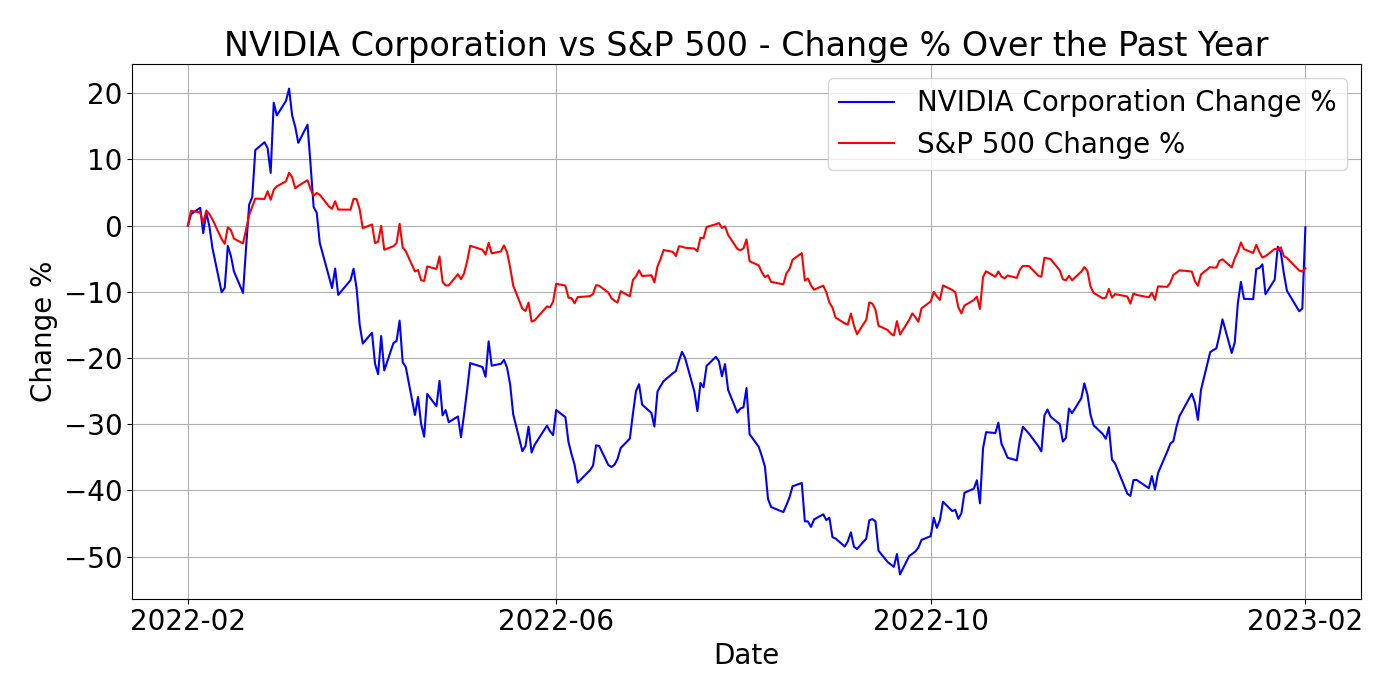

User_Proxy (to Expert_Investor):

***** Response from calling tool (call_yOBlyfkrTxpQ9cc81mYrNvUA) *****
None
**********************************************************************

--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

The share performance chart for Nvidia compared to the S&P 500 has been generated and displayed above. Now, I will proceed with generating the PE ratio and EPS performance chart for Nvidia over the past few years.

Let's generate and display the PE & EPS performance chart.
***** Suggested tool call (call_l8QbR8pi4MNfleMr3ILmY1b8): get_pe_eps_performance *****
Arguments: 
{"ticker_symbol":"NVDA","filing_date":"2023-02-24","save_path":"../report/nvda_pe_eps_performance.png"}
***************************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCT

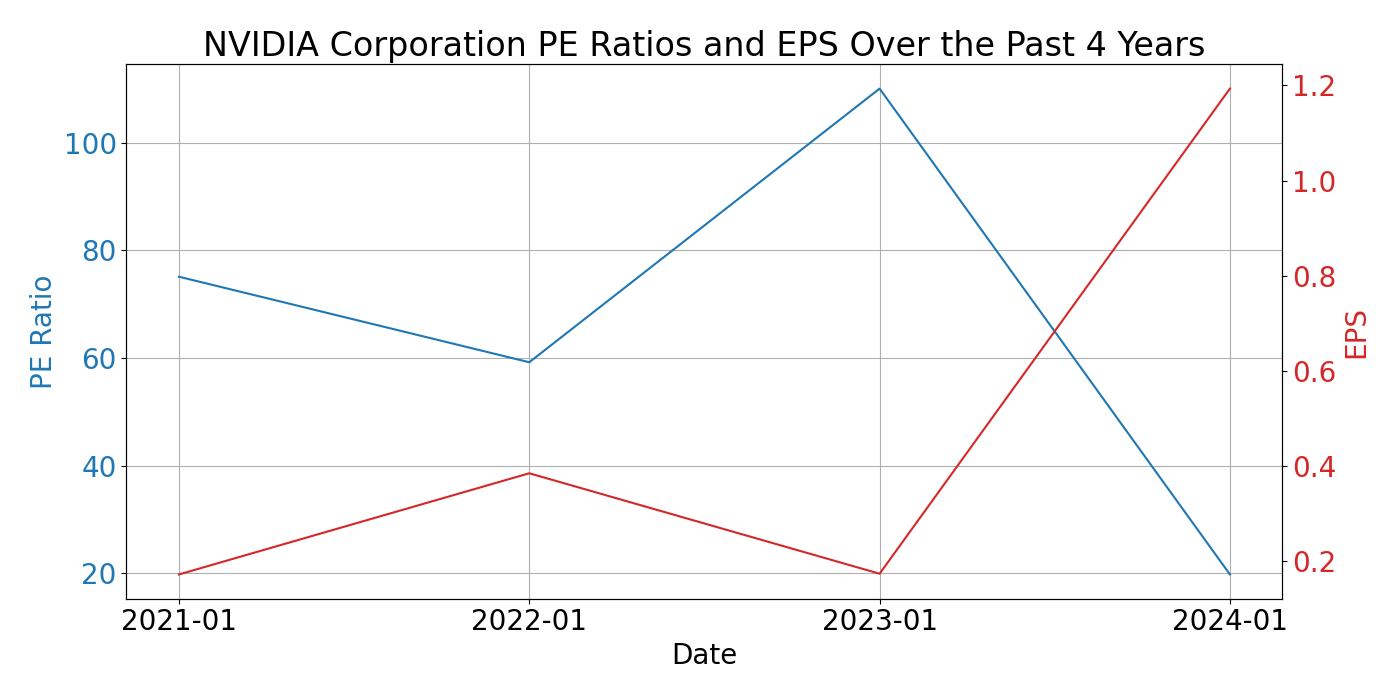

User_Proxy (to Expert_Investor):

***** Response from calling tool (call_3Q6HIOJDY4t0o394aSTgYh8u) *****
None
**********************************************************************

--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

The PE ratio and EPS performance chart for Nvidia has been generated and displayed above. 

### Next Steps:

Now that we have all the necessary analyses and visual data, I will proceed to compile the insights into coherent paragraphs. I will ensure that the combined word count of all sections is between 400 and 450 words before generating the PDF report. 

Let's begin by synthesizing the information into concise paragraphs.
### Compilation of Insights:

**Business Overview and Market Position:**
Nvidia, a leader in the semiconductor industry, has demonstrated significant growth and innovation. With a robust presence in AI, gaming, and data center markets, Nvidia leverages its cutting-edge GPU t

In [ ]:
company = "Nvidia"
fyear = "2023"

message = dedent(
    f"""
    With the tools you've been provided, write an annual report based on {company}'s {fyear} 10-k report, format it into a pdf.
    Pay attention to the followings:
    - Explicitly explain your working plan before you kick off.
    - Use tools one by one for clarity, especially when asking for instructions. 
    - All your file operations should be done in "{work_dir}". 
    - Display any image in the chat once generated.
    - All the paragraphs should combine between 400 and 450 words, don't generate the pdf until this is explicitly fulfilled.
"""
)

assistant.chat(message, use_cache=True, max_turns=50,
               summary_method="last_msg")

The Rest Cells are optional, simply used to show the generated PDF

In [1]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 4.5 MB/s eta 0:00:0000:0100:01


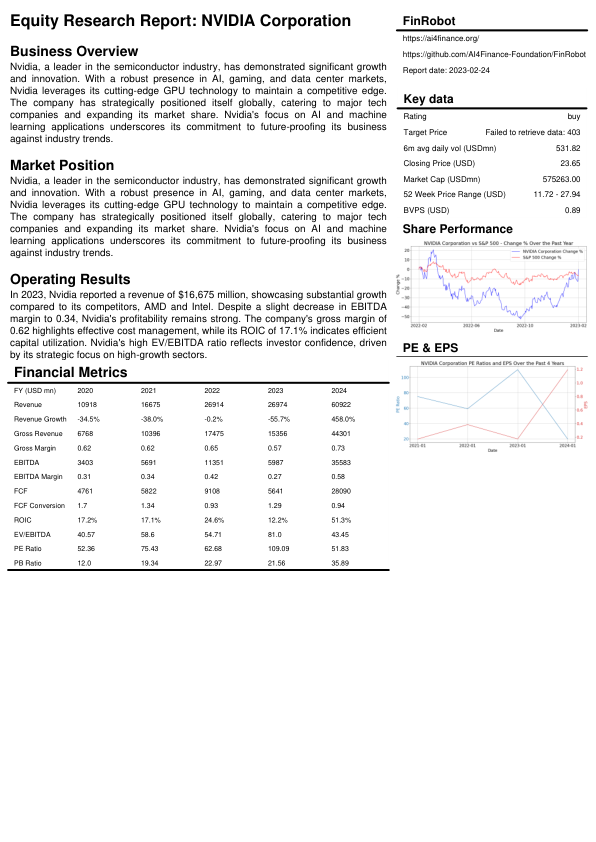

In [2]:
import io
import fitz
from PIL import Image


pdf = fitz.open("../report/nvda_annual_report_2023.pdf")
page = pdf.load_page(0)
pix = page.get_pixmap()

# Convert the Pixmap to a PIL Image
img = Image.open(io.BytesIO(pix.tobytes("png")))
display(img)